In [1]:
import pandas as pd
import matplotlib.pyplot as plt


This notebook represents experiments with the implementation of part of the code from the article "Snomed2Vec: RandomWalk and Poincaré Embeddings of a Clinical Knowledge Base for Healthcare Analytics"   

source: https://gitlab.com/agarwal.khushbu/Snomed2Vec/-/blob/master/src/embedding_learning/poincare.py 


In [2]:
df=pd.read_csv('C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT_RELATIONSHIP.csv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/master_thesis/C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT_RELATIONSHIP.csv'

In [3]:
df = df[df.relationship_id=='Is a']

In [4]:
df

,concept_id_1,concept_id_2,relationship_id,valid_start_date,valid_end_date,invalid_reason
67,281,280,Is a,19700101,20991231,NaN
74,282,281,Is a,19700101,20991231,NaN
77,283,281,Is a,19700101,20991231,NaN
80,284,281,Is a,19700101,20991231,NaN
83,285,280,Is a,19700101,20991231,NaN
...,...,...,...,...,...,...
12034931,3661632,37311061,Is a,20210129,20991231,NaN
12034932,3655975,37311061,Is a,20210129,20991231,NaN
12034933,3661748,37311061,Is a,20210129,20991231,NaN
12034934,3655976,37311061,Is a,20210129,20991231,NaN


In [5]:
len(df['relationship_id'].unique())

1

In [6]:
df.groupby(by=['relationship_id']).count().sort_values(by=['concept_id_1'])


,concept_id_1,concept_id_2,valid_start_date,valid_end_date,invalid_reason
relationship_id,,,,,
Is a,1695767,1695767,1695767,1695767,0


In [7]:
#check if the columns with subsumes and is a equal to each other
df[df.relationship_id=='Is a']['concept_id_1'].equals(df[df.relationship_id=='Subsumes']['concept_id_1'])

False

In [8]:
df[df.relationship_id=='Causative agent']

,concept_id_1,concept_id_2,relationship_id,valid_start_date,valid_end_date,invalid_reason


In [9]:
df

,concept_id_1,concept_id_2,relationship_id,valid_start_date,valid_end_date,invalid_reason
67,281,280,Is a,19700101,20991231,NaN
74,282,281,Is a,19700101,20991231,NaN
77,283,281,Is a,19700101,20991231,NaN
80,284,281,Is a,19700101,20991231,NaN
83,285,280,Is a,19700101,20991231,NaN
...,...,...,...,...,...,...
12034931,3661632,37311061,Is a,20210129,20991231,NaN
12034932,3655975,37311061,Is a,20210129,20991231,NaN
12034933,3661748,37311061,Is a,20210129,20991231,NaN
12034934,3655976,37311061,Is a,20210129,20991231,NaN


In [10]:
len(df.concept_id_1.unique())

995520

In [11]:
df_concept=pd.read_csv('C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT.csv', sep='\t')

c:\Users\Nusha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_concept[df_concept.concept_id==281]

,concept_id,concept_name,domain_id,vocabulary_id,concept_class_id,standard_concept,concept_code,valid_start_date,valid_end_date,invalid_reason
1241008,281,Medicare Managed Care,Payer,SOPT,Payer,S,11,19700101,20991231,NaN


In [13]:
df_merge=df.merge(df_concept, left_on='concept_id_1', right_on='concept_id', how='left')

In [14]:
df_merge_2=df_merge.merge(df_concept, left_on='concept_id_2', right_on='concept_id', how='left')

In [15]:
df_merge_2=df_merge_2[df_merge_2.standard_concept_x=='S'][df_merge_2.standard_concept_y=='S']

<ipython-input-15-a71ade7204fa>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_merge_2=df_merge_2[df_merge_2.standard_concept_x=='S'][df_merge_2.standard_concept_y=='S']


In [16]:

df_for_relationships=df_merge_2[['concept_id_1', 'concept_name_x', 'concept_id_2', 'concept_name_y', 'relationship_id']]

In [17]:
df_for_relationships

,concept_id_1,concept_name_x,concept_id_2,concept_name_y,relationship_id
0,281,Medicare Managed Care,280,Medicare,Is a
1,282,Medicare Health Maintenance Organization (HMO),281,Medicare Managed Care,Is a
2,283,Medicare Preferred Provider Organization (PPO),281,Medicare Managed Care,Is a
3,284,Medicare Point of Service (POS),281,Medicare Managed Care,Is a
4,285,Medicare Non-managed Care,280,Medicare,Is a
...,...,...,...,...,...
1695762,3661632,Thrombocytopenia due to Severe acute respirato...,37311061,COVID-19,Is a
1695763,3655975,Sepsis due to disease caused by Severe acute r...,37311061,COVID-19,Is a
1695764,3661748,Acute kidney injury due to disease caused by S...,37311061,COVID-19,Is a
1695765,3655976,Acute hypoxemic respiratory failure due to dis...,37311061,COVID-19,Is a


In [18]:
#function from https://gitlab.com/agarwal.khushbu/Snomed2Vec/-/blob/master/src/embedding_learning/poincare.py
def load_snomed_isa_relations(path):
    print('Parsing %s' % path)
    relations = []
    t_start = datetime.now()
    isa_relations = pd.read_csv(path, delimiter='|', usecols=['SCUI1', 'SCUI2']) 
    for row_id, row in isa_relations.iterrows():
        relations.append((row['SCUI2'], row['SCUI1']))
    return relations


In [19]:
df_for_relationships

,concept_id_1,concept_name_x,concept_id_2,concept_name_y,relationship_id
0,281,Medicare Managed Care,280,Medicare,Is a
1,282,Medicare Health Maintenance Organization (HMO),281,Medicare Managed Care,Is a
2,283,Medicare Preferred Provider Organization (PPO),281,Medicare Managed Care,Is a
3,284,Medicare Point of Service (POS),281,Medicare Managed Care,Is a
4,285,Medicare Non-managed Care,280,Medicare,Is a
...,...,...,...,...,...
1695762,3661632,Thrombocytopenia due to Severe acute respirato...,37311061,COVID-19,Is a
1695763,3655975,Sepsis due to disease caused by Severe acute r...,37311061,COVID-19,Is a
1695764,3661748,Acute kidney injury due to disease caused by S...,37311061,COVID-19,Is a
1695765,3655976,Acute hypoxemic respiratory failure due to dis...,37311061,COVID-19,Is a


In [20]:
relations=[]
for row_id, row in df_for_relationships.iterrows():
    relations.append((row['concept_name_x'], row['concept_name_y']))


In [21]:
short_rel_list=relations[0:1000]

In [22]:
short_rel_list

[('Medicare Managed Care', 'Medicare'),
 ('Medicare Health Maintenance Organization (HMO)', 'Medicare Managed Care'),
 ('Medicare Preferred Provider Organization (PPO)', 'Medicare Managed Care'),
 ('Medicare Point of Service (POS)', 'Medicare Managed Care'),
 ('Medicare Non-managed Care', 'Medicare'),
 ('Medicare Fee for Service (FFS)', 'Medicare Non-managed Care'),
 ('Medicare Non-managed Care - Other', 'Medicare Non-managed Care'),
 ('Dual Eligibility Medicare/Medicaid', 'Medicare'),
 ('Medicaid Managed Care', 'Medicaid'),
 ('Medicaid Health Management Organization (HMO)', 'Medicaid Managed Care'),
 ('Medicaid Preferred Provider Organization (PPO)', 'Medicaid Managed Care'),
 ('Medicaid Non-managed Care', 'Medicaid'),
 ('Medicaid - Other', 'Medicaid'),
 ('DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)',
  'Department of Defense'),
 ('DoD TRICARE Prime - Health Management Organization (HMO)',
  'DoD TRICARE, Civilian Health and Medical Program of 

In [23]:
from gensim.models.poincare import PoincareModel

In [24]:
model = PoincareModel(short_rel_list, size=2, burn_in=10)
model.train(epochs=150)

In [25]:
model.kv.get_vector('Medicare')

array([-0.3200558 ,  0.41427604])

In [26]:
#model.save('test_model')

In [ ]:
from puancare_train import Trainer

: 

In [28]:
tr=Trainer('C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT_RELATIONSHIP.csv', 'C://Users/Nusha/Desktop/Passaustudying/fouth semester/master/master_thesis/snomed/CONCEPT.csv')

In [44]:
model_two=tr.trainer(150)

c:\Users\Nusha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\Nusha\Desktop\Passaustudying\fouth semester\master\master_thesis\build_graph.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_merge_2=data_merge_2[data_merge_2.standard_concept_x=='S'][data_merge_2.standard_concept_y=='S']


[('Medicare Managed Care', 'Medicare'), ('Medicare Health Maintenance Organization (HMO)', 'Medicare Managed Care'), ('Medicare Preferred Provider Organization (PPO)', 'Medicare Managed Care'), ('Medicare Point of Service (POS)', 'Medicare Managed Care'), ('Medicare Non-managed Care', 'Medicare'), ('Medicare Fee for Service (FFS)', 'Medicare Non-managed Care'), ('Medicare Non-managed Care - Other', 'Medicare Non-managed Care'), ('Dual Eligibility Medicare/Medicaid', 'Medicare'), ('Medicaid Managed Care', 'Medicaid'), ('Medicaid Health Management Organization (HMO)', 'Medicaid Managed Care'), ('Medicaid Preferred Provider Organization (PPO)', 'Medicaid Managed Care'), ('Medicaid Non-managed Care', 'Medicaid'), ('Medicaid - Other', 'Medicaid'), ('DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)', 'Department of Defense'), ('DoD TRICARE Prime - Health Management Organization (HMO)', 'DoD TRICARE, Civilian Health and Medical Program of the Uniformed Serv

In [30]:
# Saves the entire PoincareModel instance, the loaded model can be trained further
#model.save('/tmp/test_model')
#model_two=PoincareModel.load('test_model')

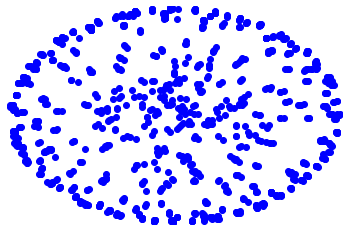

In [45]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.plot(model.kv.vectors[:,0], model.kv.vectors[:,1], 'bo')
plt.show()

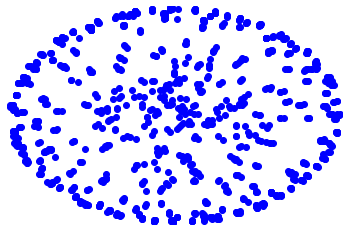

In [46]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')
plt.plot(model_two.kv.vectors[:,0], model_two.kv.vectors[:,1], 'bo')
plt.show()

In [47]:
model_two.kv.distance('Medicare Managed Care', 'Medicare')

0.5197507118376825

In [48]:
model_two.kv.get_vector('Medicare')

array([-0.3200558 ,  0.41427604])

In [49]:
model.kv.distance('Medicare Managed Care', 'Medicare')

0.5197507118376825

In [50]:
model.kv.get_vector('Medicare')

array([-0.3200558 ,  0.41427604])

In [90]:
model.kv.distance('Medicare Managed Care', 'Medicaid')

0.001751722616929864

In [91]:
model.kv.distance('Medicare Managed Care',  'Indian Health Service (IHS) Program')

0.0018941045643299406

In [20]:
model.kv.distances('Medicare Managed Care')

array([0.        , 0.18867815, 0.18391739, 0.09908007, 0.17915961,
       0.2750845 , 0.26616932, 0.29500101, 0.26653198, 0.3986695 ,
       0.3865661 , 0.43026233, 0.43174794, 0.36152676, 0.37085113,
       0.43253424, 0.4280794 , 0.45899275, 0.40382116, 0.46435682,
       0.4573117 , 0.43554984, 0.39374453, 0.37273835, 0.36948459,
       0.3316653 , 0.43724171, 0.43221784, 0.47924797, 0.41255495,
       0.46770485, 0.28188412, 0.45292896, 0.43334508, 0.42444369,
       0.35603586, 0.36655174, 0.38815897, 0.4281397 , 0.39008933,
       0.3552735 , 0.41372573, 0.39880703, 0.39066621, 0.34968392,
       0.36727441, 0.39229325, 0.36081347, 0.36017617, 0.41944751,
       0.45288487, 0.36201167, 0.34269402, 0.43058397, 0.38675412,
       0.48090447, 0.55315904, 0.49797091, 0.34587641, 0.29692686,
       0.32079828, 0.34833612, 0.32729687, 0.3960785 , 0.34118111,
       0.40507598, 0.44879299, 0.3197717 , 0.31254302, 0.36603029,
       0.39418582, 0.37500198, 0.34727527, 0.30940276, 0.41989

In [22]:
model.kv.get_vector('Medicare Managed Care')

array([-0.0022869 ,  0.00299112, -0.00200958,  0.00632274, -0.06524908,
       -0.02405351, -0.00260083,  0.00497127,  0.01154094, -0.00937415,
        0.00556683, -0.00606866,  0.02628655, -0.01193371, -0.00951324,
        0.00805059, -0.00735776, -0.01145834,  0.04951939,  0.00223066,
        0.03224431,  0.04217088, -0.01275819,  0.00283751, -0.02954229,
       -0.0195231 , -0.00624522, -0.00437425, -0.00711213, -0.02447589,
       -0.01767445,  0.0045415 , -0.02384775, -0.02704021, -0.00658045,
        0.01424553, -0.02972235, -0.01297174,  0.01730533, -0.01068032,
        0.03754758,  0.00071898, -0.02625507, -0.00630448,  0.01031059,
       -0.00088424, -0.03837844, -0.01650722, -0.00062512,  0.0032949 ])

In [37]:
len(model.kv.vectors)

114

In [125]:
model.kv.vectors[1050,0]

-0.7448468474910521

In [126]:
model.kv.vectors[1050,1]

0.19723322512481162

#### Implementation of the visualisation from https://musella.github.io/2018/11/27/poincare-embedding-amazon.html


In [114]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors


p = figure(title="Snomed 2D embedding after 30 epochs", #tools="wheel_zoom,pan,reset",
     match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

bins = p.hexbin(model.kv.vectors[:,0],model.kv.vectors[:,1], 0.03, hover_color="yellow", hover_alpha=0.3)


In [115]:
show(p)

#### Give names to the nodes 

In [163]:
import numpy as np
relat_xy=np.vstack([ model.kv.get_vector(str(x[0])) for x in short_rel_list])

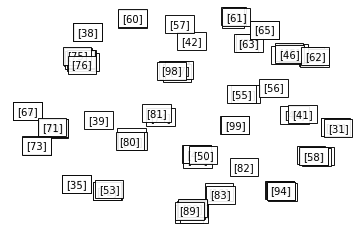

In [167]:
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axis('off')

for x in range(relat_xy.shape[0]):
    plt.annotate([x], (relat_xy[x,0], relat_xy[x,1]),
                 bbox={"fc":"white", "alpha":0.9})

plt.show()

In [171]:
model.kv.distance(short_rel_list[89][0], short_rel_list[83][0])

1.6386699445437392

In [172]:
model.kv.distance(short_rel_list[81][0], short_rel_list[80][0])

0.6575455136988542

In [173]:
model.kv.distance(short_rel_list[89][0], short_rel_list[94][0])

3.954464421586513

In [174]:
model.kv.distance(short_rel_list[71][0], short_rel_list[67][0])

1.8291542825779226

In [175]:
model.kv.distance(short_rel_list[71][0], short_rel_list[73][0])

1.6633450678244939

#### Visualise some points of the data

In [198]:
shortest_rel_list=short_rel_list[50:70]

In [199]:
shortest_rel_xy = [ np.vstack(  [ model.kv.get_vector(str(x)) for x in community ] ) for community in shortest_rel_list]

In [200]:
from bokeh.io import output_file, output_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap
from bokeh.util.hex import hexbin
from bokeh.models import HoverTool
from bokeh import colors


p = figure(title="Snomed 2D embedding after 30 epochs", #tools="wheel_zoom,pan,reset",
     match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

bins = p.hexbin(model.kv.vectors[:,0],model.kv.vectors[:,1], 0.03, hover_color="yellow", hover_alpha=0.3)

# trick to get a different color for each community
points_colors = colors.named.__all__

# loop over communities and add them to the plot
for icomm,(col,comm) in enumerate(zip(points_colors,shortest_rel_xy)):
    name=str(icomm)
    p.scatter(comm[:,0],comm[:,1],color=col,alpha=0.5,name=name)
	# make hover to display the community id
    hover = HoverTool(names=[name])
    hover.tooltips = [ ('relation',name) ]
    p.add_tools(hover)


show(p)

In [187]:
short_rel_list[76]

('DoD TRICARE Reserve Select',
 'DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)')

In [188]:
short_rel_list[14]

('DoD TRICARE Prime - Health Management Organization (HMO)',
 'DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)')

In [189]:
short_rel_list[75]

('DoD TRICARE For Life - Medicare Supplement',
 'DoD TRICARE, Civilian Health and Medical Program of the Uniformed Services (CHAMPUS)')